In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_name = "Khondaker data request.xlsm"

hourly_CHW = pd.read_excel(file_name, sheet_name="CHW hourly", index_col="Timestamp").drop("Date", axis=1)
total_CHW = pd.read_excel(file_name, sheet_name="CHW totals")
hourly_MTHW = pd.read_excel(file_name, sheet_name="MTHW hourly", index_col="Timestamp").drop("Date", axis=1)
total_MTHW = pd.read_excel(file_name, sheet_name="MTHW totals")
hourly_ELEC = pd.read_excel(file_name, sheet_name="ELEC hourly", index_col="Timestamp").drop("Date", axis=1)
total_ELEC = pd.read_excel(file_name, sheet_name="ELEC totals")



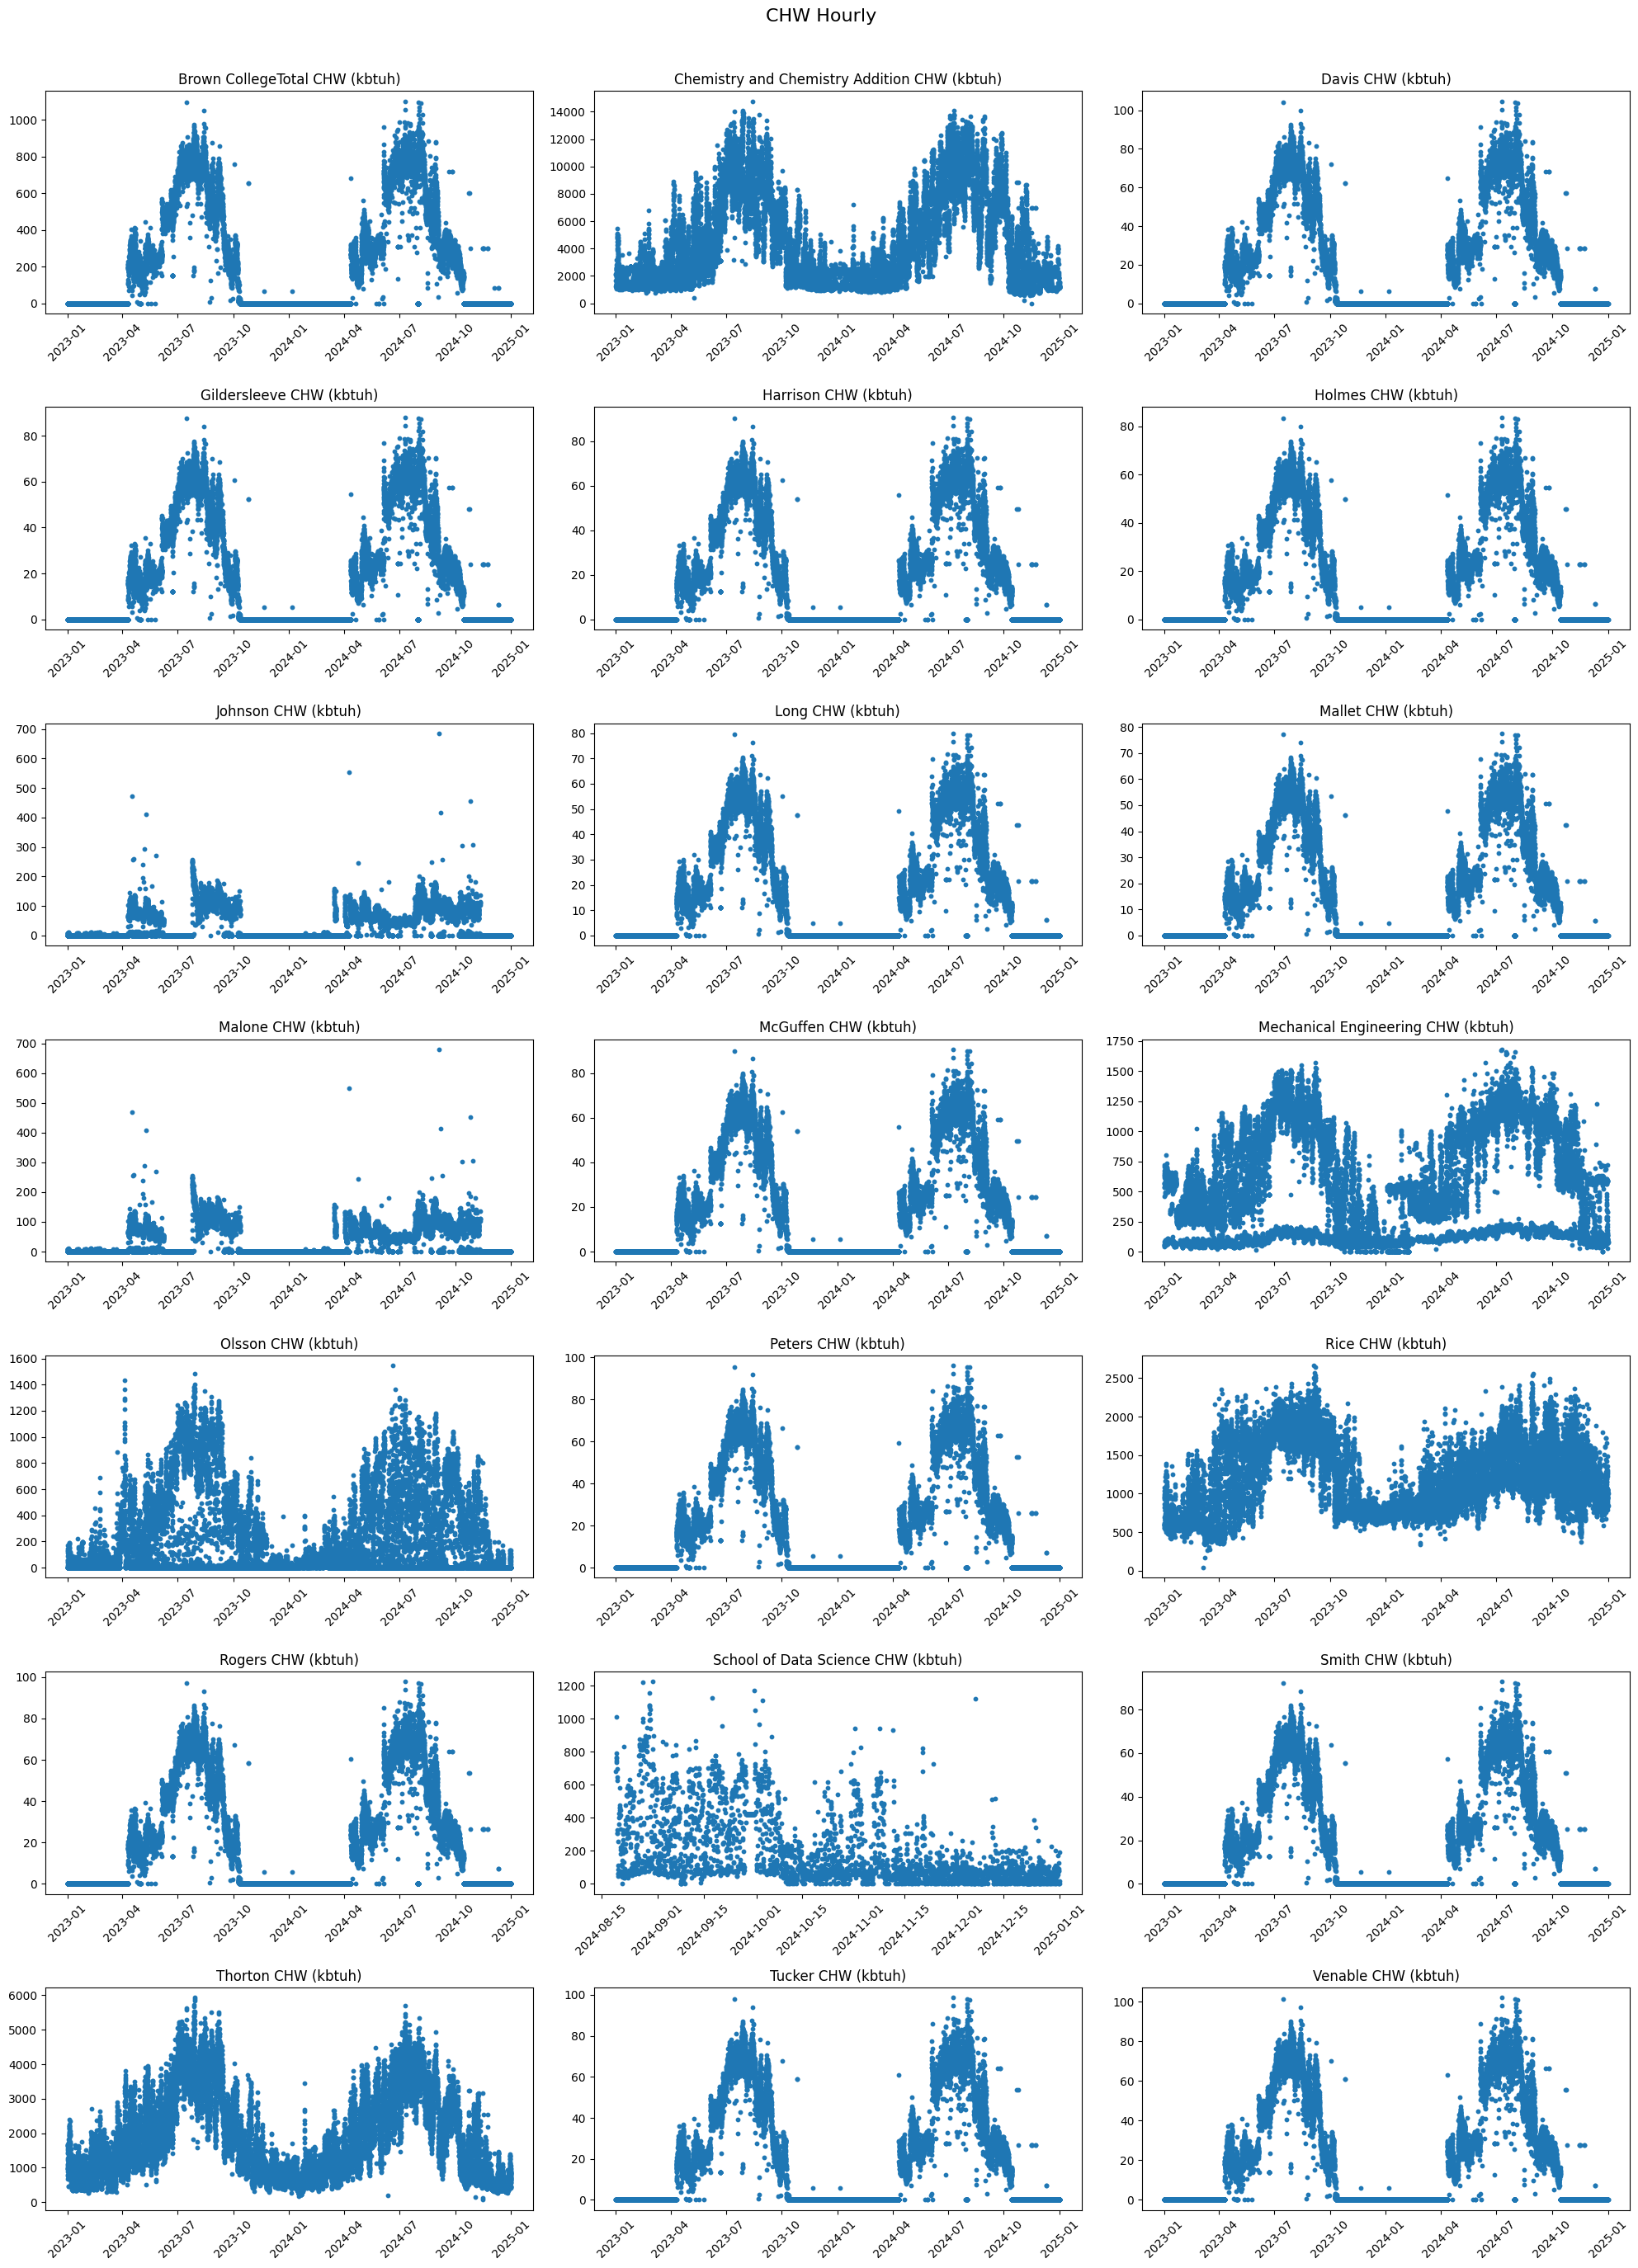

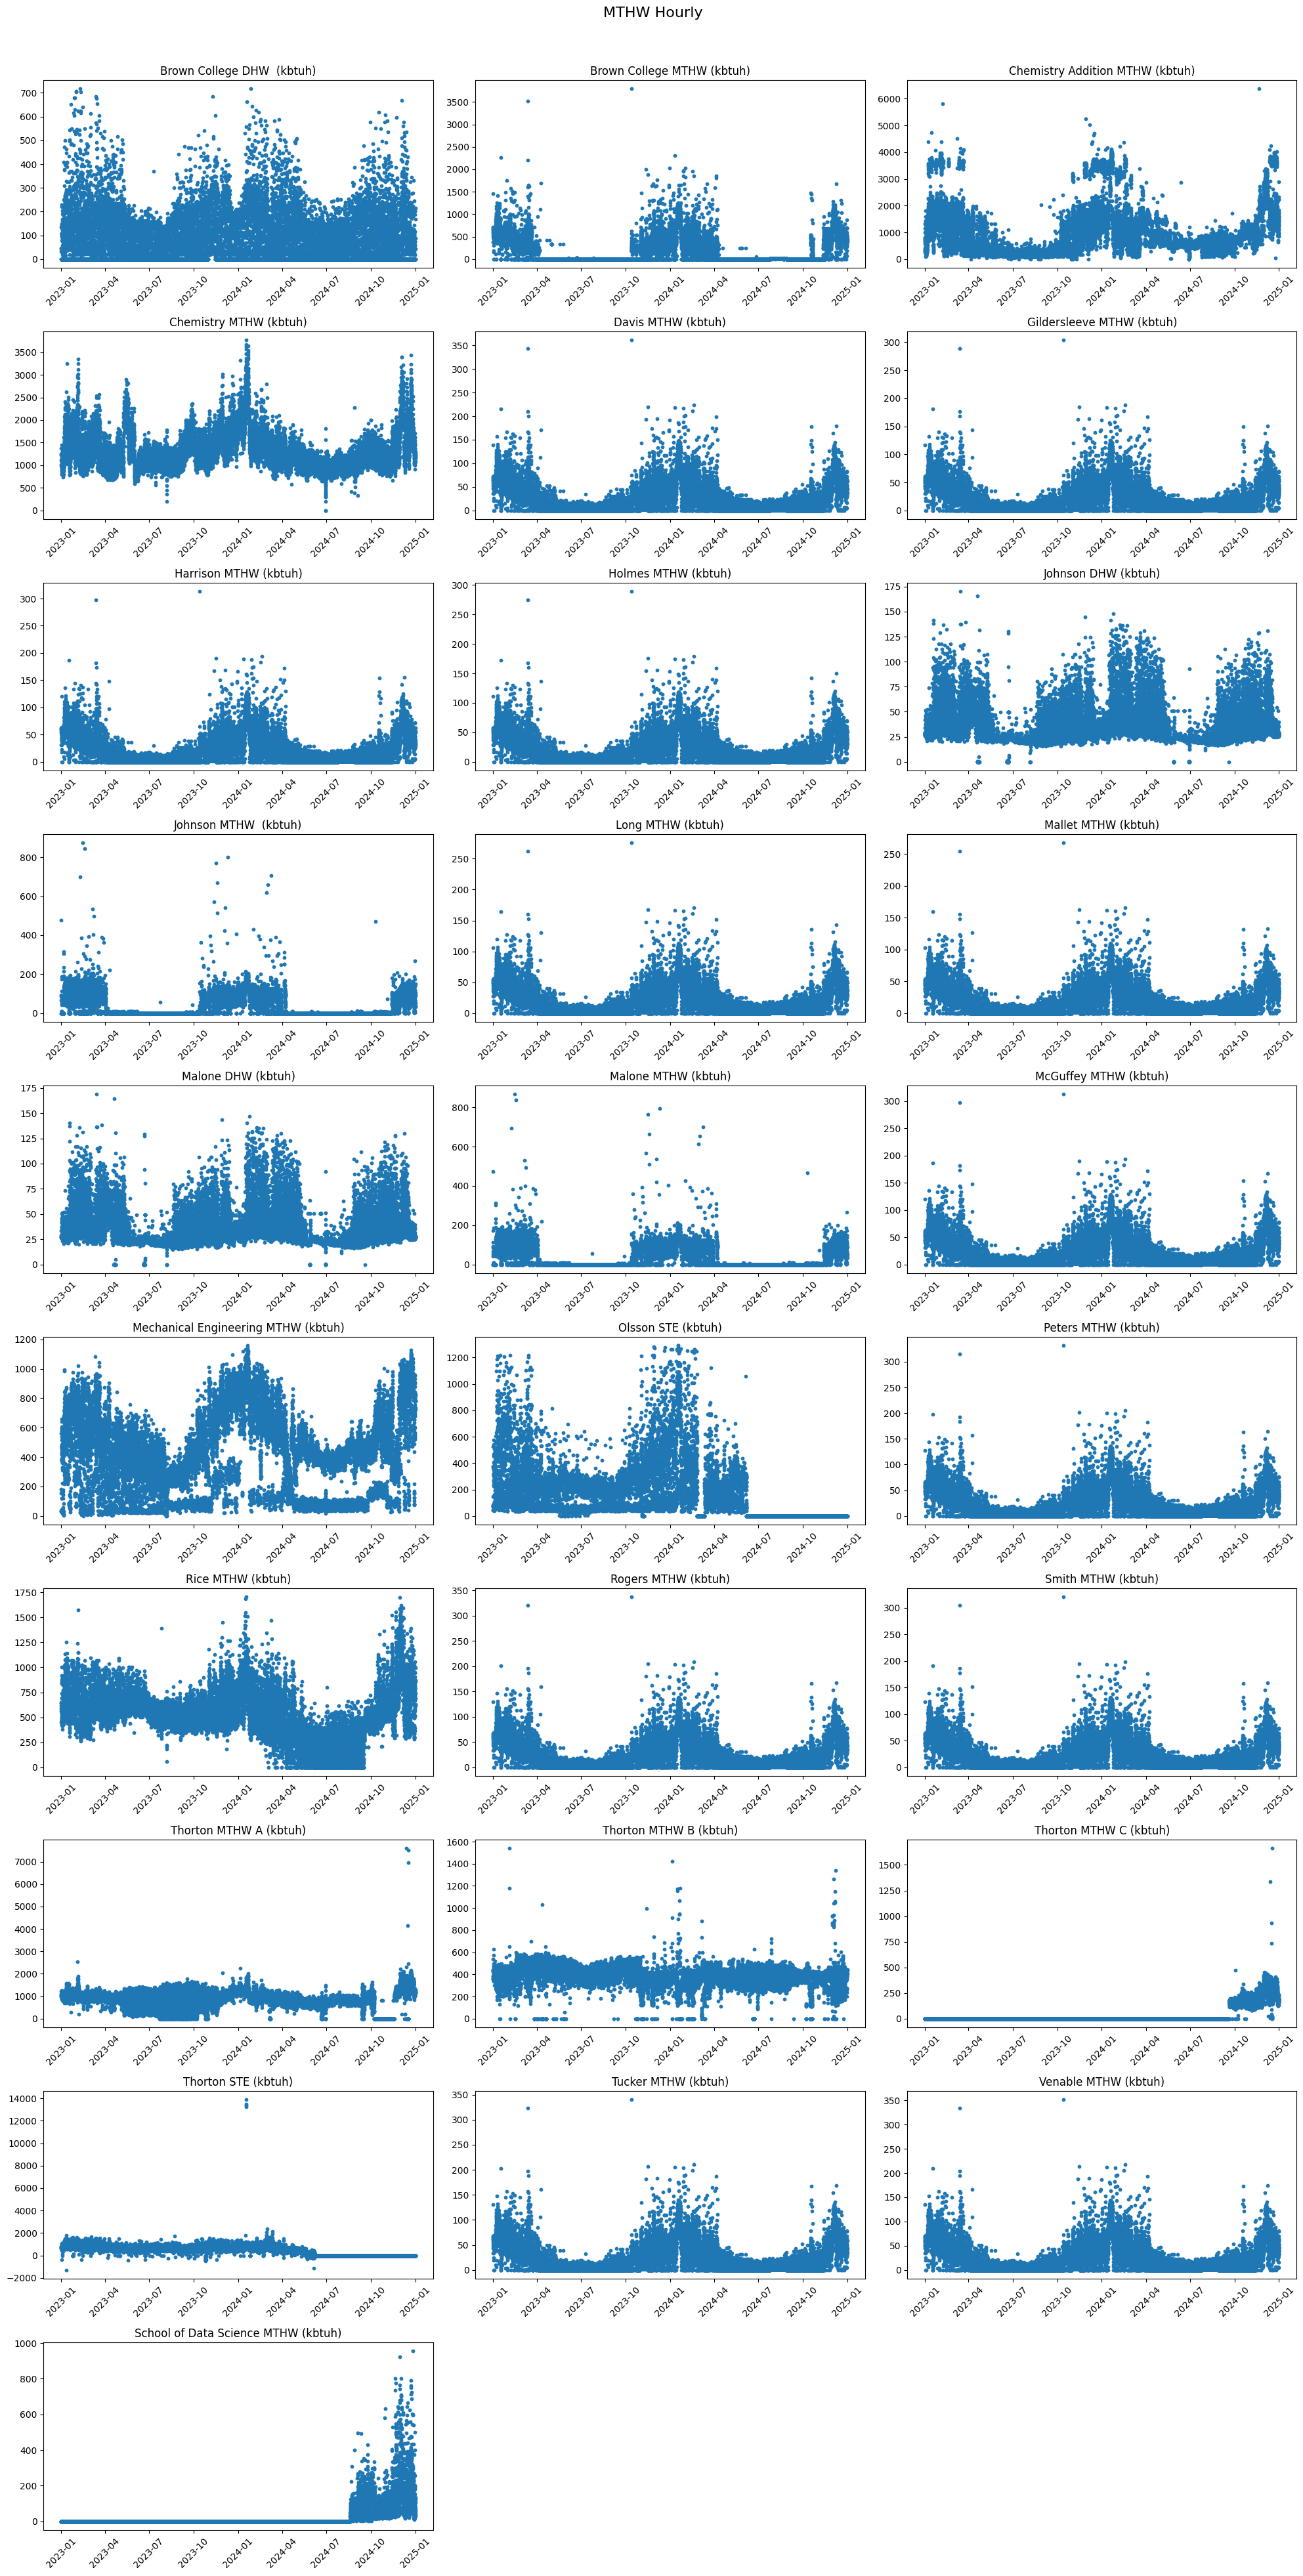

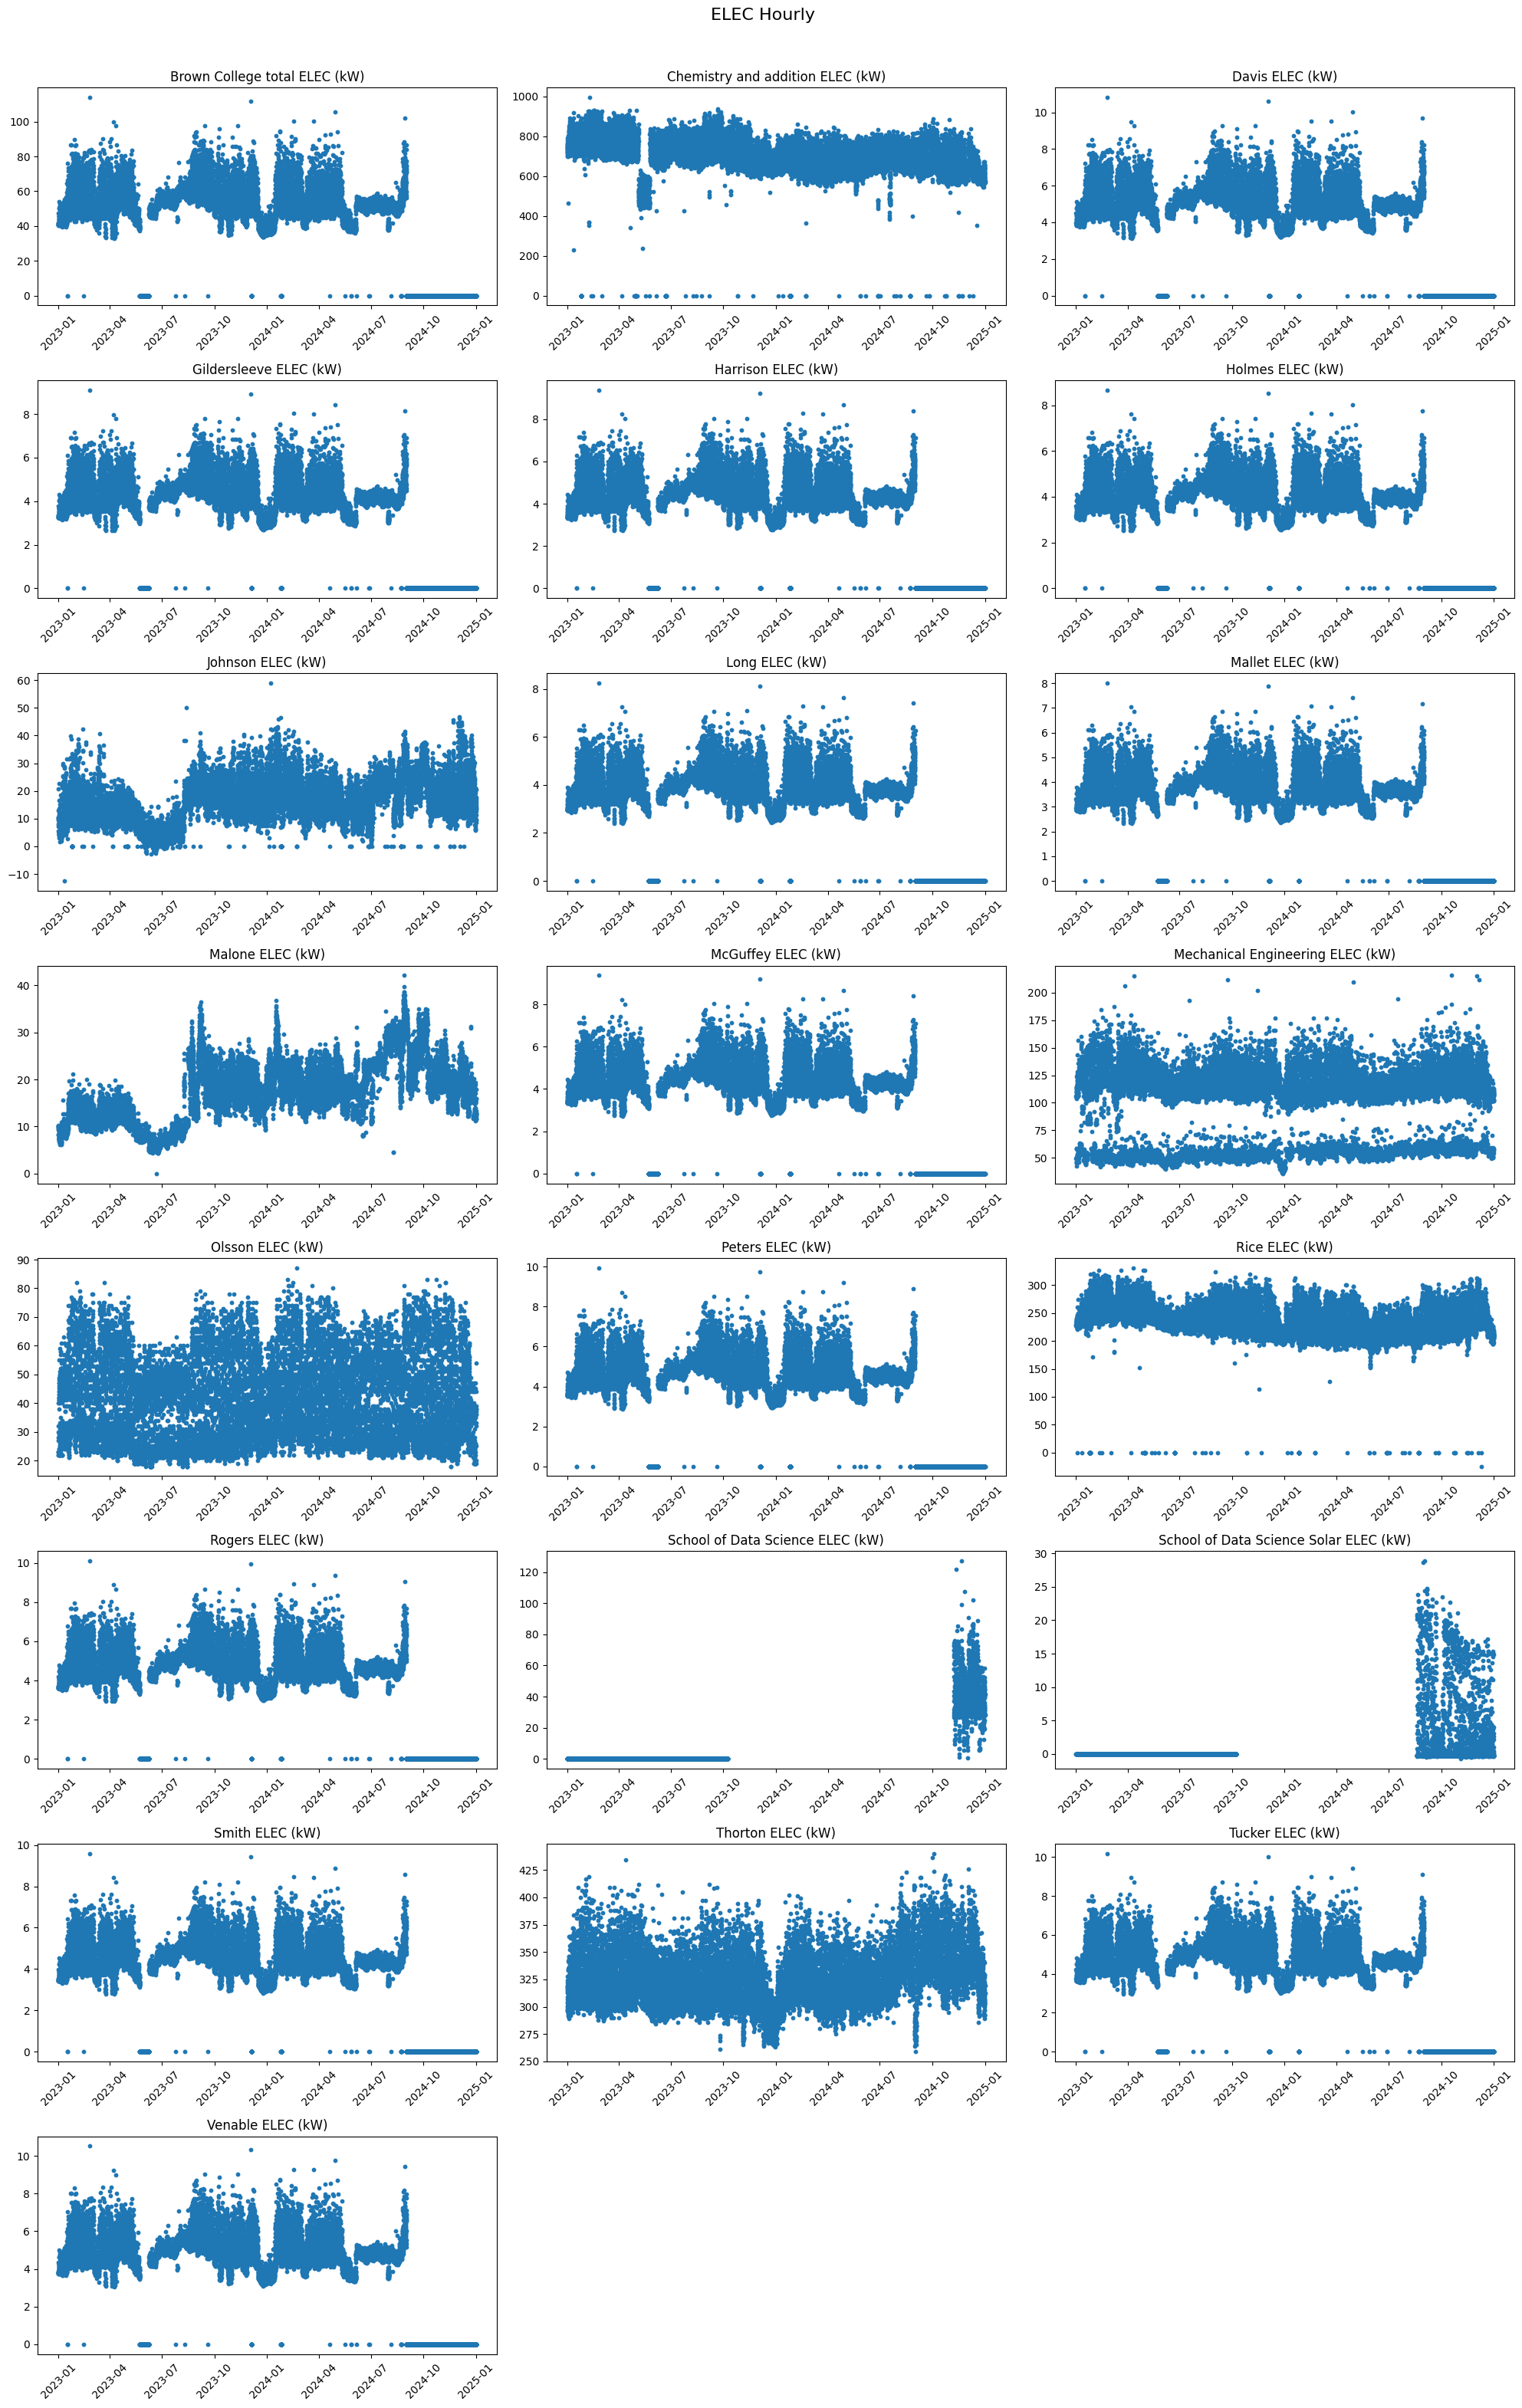

In [10]:
import math

def scatter_grid(df, title, cols_per_row=3):
    cols = df.columns
    n = len(cols)
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 4 * rows), sharex=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        ax.scatter(df.index, df[col], s=10)
        ax.set_title(col)
        ax.tick_params(axis='x', labelrotation=45)

    for ax in axes[n:]:
        ax.set_visible(False)

    fig.suptitle(title, fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

scatter_grid(hourly_CHW, "CHW Hourly")
scatter_grid(hourly_MTHW, "MTHW Hourly")
scatter_grid(hourly_ELEC, "ELEC Hourly")

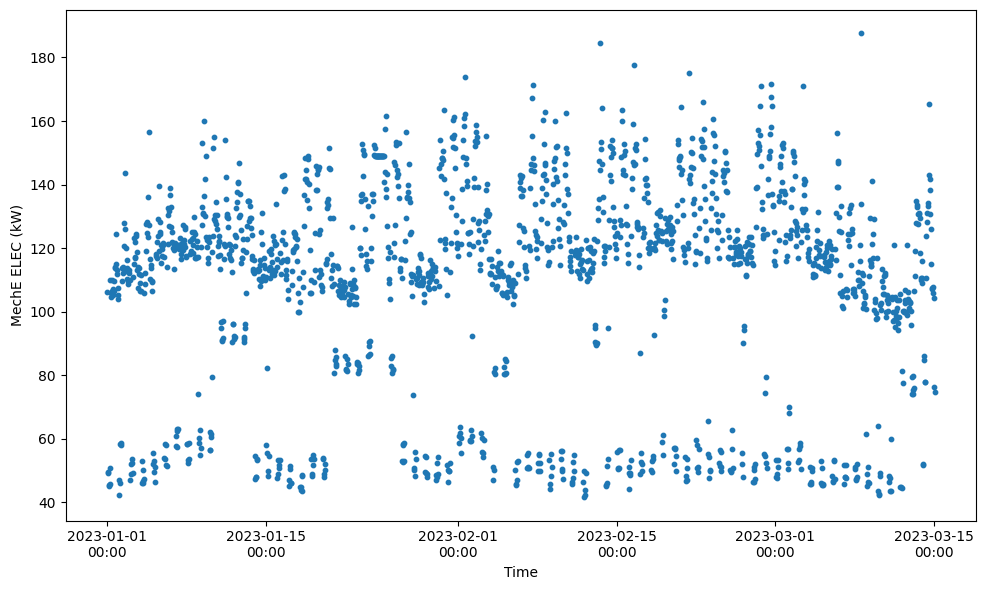

In [11]:
sliceLength = int(len(hourly_ELEC.index) * 0.1)
times = pd.to_datetime(hourly_ELEC.index[:sliceLength])
mechE = hourly_ELEC["Mechanical Engineering ELEC (kW)"][:sliceLength]

plt.figure(figsize=(10, 6))
plt.scatter(times, mechE, s=10)
plt.ylabel("MechE ELEC (kW)")
plt.xlabel("Time")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
plt.tight_layout()
plt.show()


In [12]:
# Matrix Profile on subset of data
import stumpy as st

mp = st.stump(mechE, m=100)


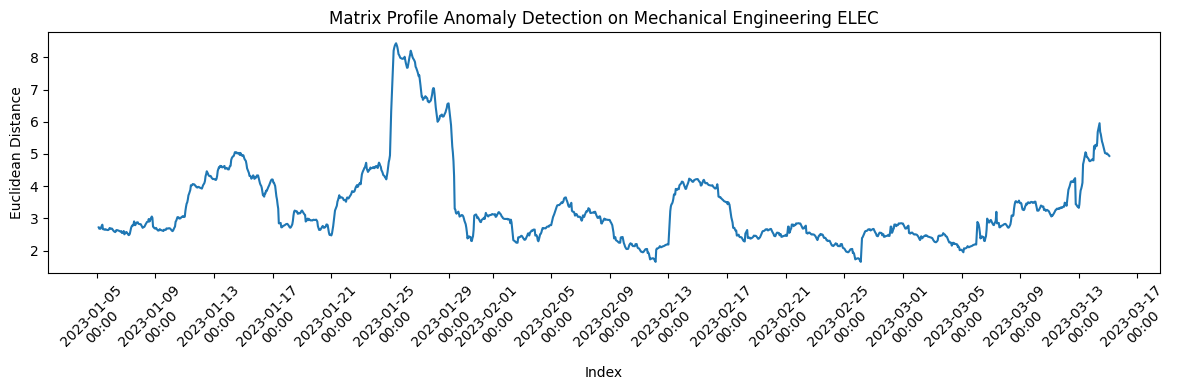

In [57]:
plt.figure(figsize=(12, 4))
ax = plt.gca()
ax.plot(times[99:], mp[:, 0], color='tab:blue')
ax.set_title("Matrix Profile Anomaly Detection on Mechanical Engineering ELEC")
ax.set_xlabel("Index")
ax.set_ylabel("Euclidean Distance")
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=20))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Matrix Profile shows spike around 1/13/2023, 1/25/2023, 2/13/2023, and 3/15/2023
# Makes sense if we look at the graph above, as the medians in those sliding windows are much greater

In [54]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=300, contamination='auto')
outliers = lof.fit_predict(pd.DataFrame(mechE))
outliers_lof = mechE[outliers == -1]
nonoutliers_lof = mechE[outliers != -1]

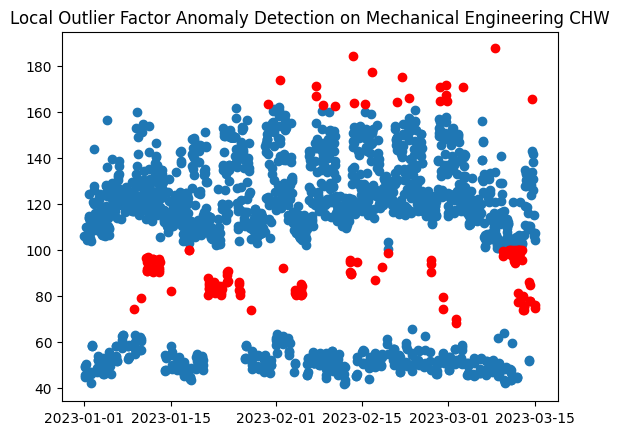

In [ ]:
plt.scatter(nonoutliers_lof.index, nonoutliers_lof)
plt.scatter(outliers_lof.index, outliers_lof, c='red')
plt.title("Local Outlier Factor Anomaly Detection on Mechanical Engineering ELEC")

plt.show()